In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
import seaborn as sns

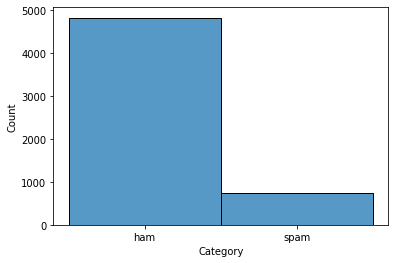

In [ ]:
sns.histplot(x='Category',data=df)

In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

### The number of spam mails are less

In [ ]:
df['Spam']=df['Category'].map({'ham':0, 'spam':1})

### convert ham to zero and spam to 1

In [ ]:
df.drop('Category',axis='columns',inplace=True)

In [ ]:
df.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
x = df['Message']
y = df['Spam']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train ,x_test ,y_train,y_test = train_test_split(x,y, test_size = 0.3)

# we'll be using countvectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [ ]:
# before testing we have to convert test data.

x_test_count = cv.transform(x_test)
x_test_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
model.predict(x_test_count)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(x_test_count,y_test)

0.9880382775119617

## Instead of converting manually multiple times we can use sklearn Pipeline feature

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',CountVectorizer()),('nb',MultinomialNB())])

In [ ]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
model.score(x_test,y_test)

0.9880382775119617

In [ ]:
# not spam 
model.predict(['Hey mohan, can we get together to watch footbal game tomorrow?'])

array([0])

In [ ]:
# spam
model.predict(['Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward'])

array([1])